In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import pymssql
import datetime as dt
from sqlalchemy import create_engine

In [3]:
############################################################################################
##  Forma profesional de hacer la conexión (cadena del engine con ayuda de Luis) ; (ORM)  ##
############################################################################################

server = "Unificada"
database = "ASIGNA"
 
conn = pyodbc.connect("DRIVER={SQL Server};SERVER=" + server + ";trusted_connection=yes;")
 
engine = create_engine(f"mssql+pyodbc://@{server}/{database}?trusted_connection=yes&driver=SQL+Server")
engine = engine.connect()

######################################
##  filtrar el ultimo mes guardado  ##
######################################

print("Ejecutando consulta...")
query = "SELECT * FROM [ASIGNA].[dbo].[te_repostajes] where fechaTransaccion >= '2024-01-01'"
df = pd.read_sql(query, engine)

# Mostrar los primeros registros
print("Consulta ejecutada. Mostrando los primeros resultados:")
#df.to_csv('tabla_comp.csv', index=False) #descargar tabla transformada
print(df_c.head())

#conn.close() # hay que hacerlo al terminar el notebook

Ejecutando consulta...
Consulta ejecutada. Mostrando los primeros resultados:
   tipoReg  externo  id   IDTransaccion    flota IDEstacion       Estacion  \
0  Arriaga        0   1  44562245255Vit  Arriaga      50084  ES00001GP0084   
1  Arriaga        0   2  445620,5255Vit  Arriaga      50084  ES00001GP0084   
2  Arriaga        0   3  44562155255Vit  Arriaga      50084  ES00001GP0084   
3  Arriaga        0   4  44562155255Vit  Arriaga      50084  ES00001GP0084   
4  Arriaga        0   5  44562425376Vit  Arriaga      50084  ES00001GP0084   

   Bomba Matricula   equipo  ... importe    guid  empresa  procesado  borrado  \
0      1   5255LRY  5255LRY  ...     0.0  manual      ARR        2.0      0.0   
1      1   5255LRY  5255LRY  ...     0.0  manual      ARR        2.0      0.0   
2      1   5255LRY  5255LRY  ...     0.0  manual      ARR        2.0      0.0   
3      1   5255LRY  5255LRY  ...     0.0  manual      ARR        2.0      0.0   
4      1   5376JPN  5376JPN  ...     0.0  manual

In [12]:
"""
pyodbc vendría siendo la librería para tareas medio sencillas
Y el engine es el objeto clave de la librería sqlalchemy para mayor funcionalidad por encima del pyodbc (Cuando se requiere tareas del nivel de un ORM)
"""
##########################################################################
##  Así hice inicialmente el ejercicio, con "conn", que es válido para  ##
##  éste ejemplo, pero es preferible acostumbrarse a lo de arriba       ##
##########################################################################

# Datos de conexión
server = 'unificada.grupodamas.com'  # Ejemplo: 'localhost' o la IP del servidor SQL
database = 'ASIGNA'  # Nombre de la base de datos

# Conexión a SQL Server utilizando autenticación de Windows
print("Conectando a la base de datos...")

conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                      f'SERVER={server};'
                      f'DATABASE={database};'
                      f'Trusted_Connection=yes')

# Crear un cursor
#print("creando cursor...")
#cursor = conn.cursor()

######################################
##  filtrar el ultimo mes guardado  ##
######################################

# Realizar una consulta SQL
print("Ejecutando consulta...")
query = "SELECT * FROM [ASIGNA].[dbo].[te_repostajes] where fechaTransaccion >= '2024-01-01'"
#cursor.execute('SELECT * FROM query')
df = pd.read_sql(query, conn)
##df = pd.read_sql(query, engine)

# Mostrar los primeros registros
print("Consulta ejecutada. Mostrando los primeros resultados:")
print(df.head())

Conectando a la base de datos...
Ejecutando consulta...


C:\Users\amerino.practicas\AppData\Local\Temp\ipykernel_20472\1255223926.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Consulta ejecutada. Mostrando los primeros resultados:
   tipoReg  externo     id IDTransaccion    flota IDEstacion       Estacion  \
0  Arriaga        0  48495             0  Arriaga      50084  ES00001GP0084   
1  Arriaga        0  48496             1  Arriaga      50084  ES00001GP0084   
2  Arriaga        0  48497             2  Arriaga      50084  ES00001GP0084   
3  Arriaga        0  48498             3  Arriaga      50084  ES00001GP0084   
4  Arriaga        0  48499             4  Arriaga      50084  ES00001GP0084   

   Bomba Matricula   equipo  ... importe guid  empresa  procesado  borrado  \
0      1   3540LXW  3540LXW  ...     0.0  man      ARR        0.0        0   
1      1   5162JMV  5162JMV  ...     0.0  man      ARR        0.0        0   
2      1   3540LXW  3540LXW  ...     0.0  man      ARR        0.0        0   
3      1   3467JDX  3467JDX  ...     0.0  man      ARR        0.0        0   
4      1   2866LZT  2866LZT  ...     0.0  man      ARR        0.0        0   

 

In [11]:
"""
pyodbc vendría siendo la librería para tareas medio sencillas
Y el engine es el objeto clave de la librería sqlalchemy para mayor funcionalidad por encima del pyodbc (Cuando se requiere tareas del nivel de un ORM)
"""
############################################
##  Prueba cursor en lugar de read.sql()  ##
############################################

# Datos de conexión
server = 'unificada.grupodamas.com'  # Ejemplo: 'localhost' o la IP del servidor SQL
database = 'ASIGNA'  # Nombre de la base de datos

# Conexión a SQL Server utilizando autenticación de Windows
print("Conectando a la base de datos...")

conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                      f'SERVER={server};'
                      f'DATABASE={database};'
                      f'Trusted_Connection=yes')

# Crear un cursor
print("creando cursor...")
cursor = conn.cursor()

######################################
##  filtrar el ultimo mes guardado  ##
######################################

# Realizar una consulta SQL con pd.read_sql (genera warning)
print("Ejecutando consulta...")

cursor.execute("SELECT * FROM [ASIGNA].[dbo].[te_repostajes] where fechaTransaccion >= '2024-01-01'")

rows = []

# Obtener los nombres de las columnas
columnas = [column[0] for column in cursor.description]
#columns = [desc[0] for desc in cursor.description]
"""
for row in cursor:
    rows.append(row)
"""
for row in cursor:
    # Agregar una nueva columna con algún valor extra
    # Por ejemplo, podemos agregar un valor calculado o un valor fijo
    extra_value = 'valor_adicional'  # Esto puede ser un cálculo o un valor fijo
    row_with_extra = list(row) + [extra_value]  # Combina la fila con la nueva columna
    rows.append(row_with_extra)

# Verificar cuántas columnas tenemos
print(f"Número de columnas: {len(columns)}")
print(f"Nombres de las columnas: {columns}")

# Obtener los datos de la consulta
#datos = cursor.fetchall()

# verificacion

# Crear el DataFrame con los datos obtenidos
df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
print(df)

# Mostrar los primeros registros
print("Consulta ejecutada. Mostrando los primeros resultados:")
print(df.head())

Conectando a la base de datos...
creando cursor...
Ejecutando consulta...
Número de columnas: 27
Nombres de las columnas: ['tipoReg', 'externo', 'id', 'IDTransaccion', 'flota', 'IDEstacion', 'Estacion', 'Bomba', 'Matricula', 'equipo', 'fechaTransaccion', 'HoraTransaccion', 'cantidad', 'Kilometraje', 'IDProducto', 'descProducto', 'Automatico', 'importe', 'guid', 'empresa', 'procesado', 'borrado', 'nif', 'importe_neto', 'NFactura', 'FuenteOrigen', 'descuento']


ValueError: Shape of passed values is (163041, 1), indices imply (163041, 27)

In [3]:

# Sacamos el primer y último día del mes anterior respecto a la fecha actual
today = pd.to_datetime('today')
fday_thisMonth = today.replace(day=1)
lday = fday_thisMonth - dt.timedelta(days=1)
fday = lday.replace(day=1)

df['fechaTransaccion'] = pd.to_datetime(df['fechaTransaccion'])

lastm = df[(df['fechaTransaccion'] >= pd.to_datetime(fday)) & 
            (df['fechaTransaccion'] <= pd.to_datetime(lday))]

# opción más simple a todo lo anterior
##df['fechaTransaccion'] = pd.to_datetime(df['fechaTransaccion'])
##lastm = df[(df['fechaTransaccion'].dt.month == 10) & (df['fechaTransaccion'].dt.year == 2025)]

In [4]:
########################################################
##  sacar totales por [tipoReg] (importe y cantidad)  ##
########################################################

lastm = lastm.groupby('tipoReg').agg({'importe': 'sum', 'cantidad': 'sum'}).reset_index()

lastm.head(8)

,tipoReg,importe,cantidad
0,Arriaga,0.00000,123288.7300
1,Autopol,0.00000,652178.0900
2,Cepsa,0.00000,34589.1681
3,Ext_Mur,1485.90500,237266.6800
4,Fuelomat,0.00000,672688.8800
5,GK7,842.88002,113559.8600


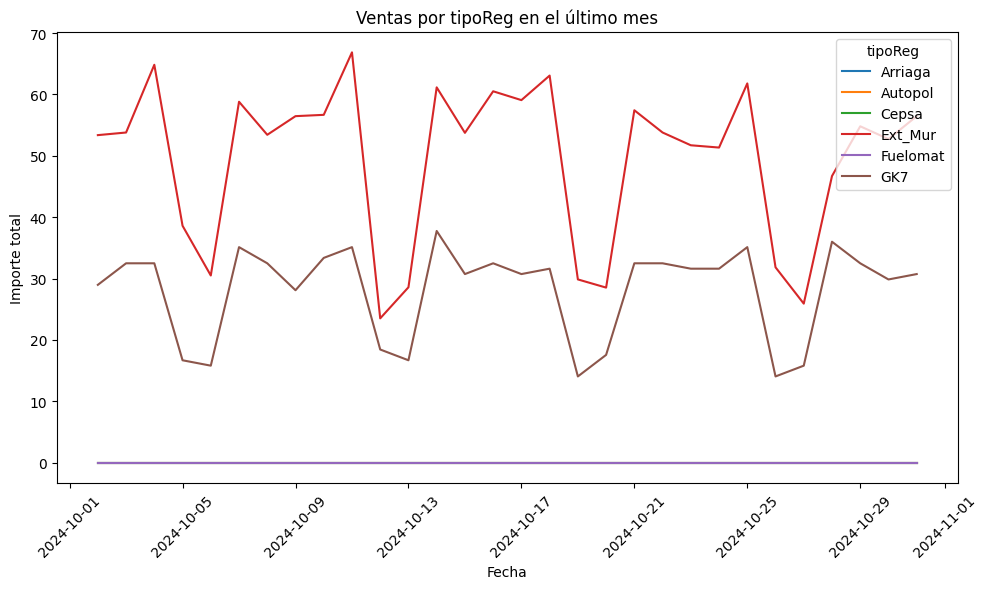

In [5]:
###########################################
##  sacar grafica por [tipoReg] y FECHA  ##
###########################################

%matplotlib inline

# Repetir esto para volver a usar lastm con todas las columnas
today = pd.to_datetime('today')
fday_thisMonth = today.replace(day=1)
lday = fday_thisMonth - dt.timedelta(days=1)
fday = lday.replace(day=1)

df['fechaTransaccion'] = pd.to_datetime(df['fechaTransaccion'])

lastm = df[(df['fechaTransaccion'] >= pd.to_datetime(fday)) & 
            (df['fechaTransaccion'] <= pd.to_datetime(lday))]

# ".loc[:, " elimina un warning por peligro a que se modifiquen los datos originales en lugar
# de modificar unicamente la copia
lastm.loc[:, 'fechaTransaccion'] = pd.to_datetime(lastm['fechaTransaccion'])

ventas_agrupadas = lastm.groupby(['tipoReg', 'fechaTransaccion']).agg({'importe': 'sum'}).reset_index()

# Para filtrar por mes periodos más largos de tiempo:
"""
# Agrupar por 'tipoReg' y mes (extrayendo el año y mes de la fecha)
lastm['año_mes'] = lastm['fechaTransaccion'].dt.to_period('M')  # Esto convierte la fecha a un periodo mensual
# Agrupar por 'tipoReg' y 'año_mes' (año y mes) y obtener la suma del 'importe'
ventas_agrupadas = lastm.groupby(['tipoReg', 'año_mes']).agg({'importe': 'sum'}).reset_index()
"""
# Crear una figura y un eje para la gráfica
plt.figure(figsize=(10, 6))

for tipo in ventas_agrupadas['tipoReg'].unique():
    # Filtrar las ventas para el tipoReg actual
    tipo_df = ventas_agrupadas[ventas_agrupadas['tipoReg'] == tipo]
    # Graficar la suma de 'importe' por 'fechaTransaccion' (por día)
    plt.plot(tipo_df['fechaTransaccion'], tipo_df['importe'], label=tipo)
    # Graficar la suma de 'importe' por 'año_mes'
    # plt.plot(tipo_df['año_mes'].astype(str), tipo_df['importe'], label=tipo)

# Personalizar la gráfica
plt.title('Ventas por tipoReg en el último mes')
plt.xlabel('Fecha')
plt.ylabel('Importe total')
plt.legend(title='tipoReg')
plt.xticks(rotation=45)  # Rotar las fechas para mejor visibilidad
plt.tight_layout()  # Ajustar el diseño para que todo se vea bien

# Mostrar la gráfica
plt.show()
# lastm.groupby('tipoReg')['tipoReg'].count().agg({'importe': 'sum', 'cantidad': 'sum'}).plot(kind='bar')

conn.close() # hay que hacerlo al terminar el notebook